In [6]:
import numpy as np
from scipy.stats import norm
import mean_confidence_interval as conf
import geometric_brownian_motion as gbm

In [7]:
class EuropeanOption(object):
    '''
    Class for European Option valuation
    contract - option contract (put or call)
    S0 - initial stock value
    K - strike price
    T - time to maturity (years)
    r - annual risk free rate 
    mu - expected return
    sigma - volatility
    steps - number of steps in discretization
    reps - number of simulations 
    '''
    # Constructor
    def __init__(self,contract,S0,K,T,r,mu,sigma,steps,reps):
        self.contract = contract
        self.S0 = float(S0)
        self.K = float(K)
        self.T = float(T)
        self.r = float(r)
        self.mu = float(mu)
        self.sigma = float(sigma)
        self.steps = steps
        self.reps = reps
        self.interval = float(T/steps)
        if (contract != 'call') & (contract != 'put'):
            raise ValueError('Invalid Contract Type. Specify <call> or <put>')
        self.value = self.Sim_value()
    def BS_value(self):
        '''
        Return European option value using Black-Scholes equation
        '''
        d1 = (1/(self.sigma*self.T))*(np.log(self.S0/self.K)+(self.r+0.5*self.sigma**2)*self.T)
        d2 = d1 - self.sigma*self.T
        if self.contract =='call':
            value = norm.cdf(d1)*self.S0 - norm.cdf(d2)*self.K*np.exp(-self.r*self.T)
        elif self.contract =='put':
            value = norm.cdf(-d2)*self.K*np.exp(-self.r*self.T)-norm.cdf(-d1)*self.S0
        return value
    def Sim_value(self):
        '''
        Return European option value using Brownian Random Walk Monte-Carlo simulation
        '''
        prices = gbm.BRW(self.mu,self.sigma,self.S0,self.T,self.reps,self.steps)
        self.final_price = prices[:,-1]
        values=[]
        for val in self.final_price:
            if self.contract =='call':
                values.append(np.exp(-self.r*self.T)*np.maximum(0.0,val - self.K))
            elif self.contract =='put':
                values.append(np.exp(-self.r*self.T)*np.maximum(0.0,self.K - val))
        value, CI_95 = conf.CI(values)
#         error = np.abs(value-self.BS_value())/self.BS_value()
        return value, CI_95 #error

In [8]:
test_call = EuropeanOption(contract='call',S0=100,K=105,T=1,r=0.05,mu=0.05,sigma=0.2,steps=100,reps=10000)
print 'Black-Scoles Value:',test_call.BS_value()
print 'Simulated Value:',test_call.value

Black-Scoles Value: 8.02135223514
Simulated Value: (7.8661673118635544, 0.25376641467606326)


In [27]:
price = test_call.final_price
payoff = np.maximum(0,price-100)

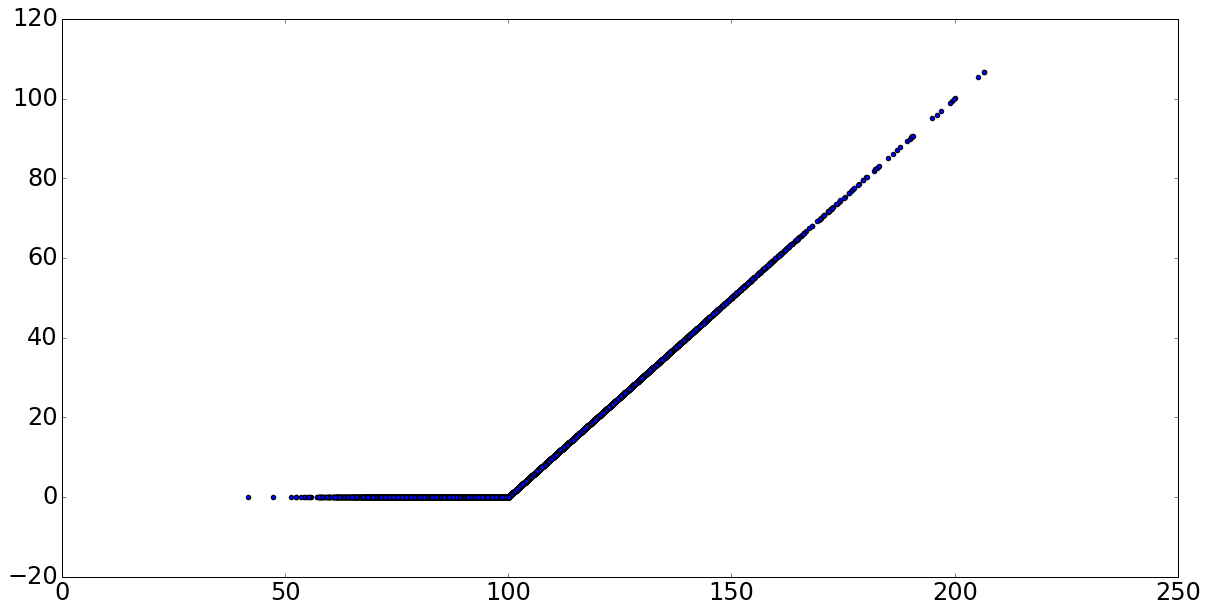

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 24})
plt.scatter(price,payoff)
# plt.xlabel('Delta')
# plt.ylabel('Derivative Value')
# plt.title('Boxplot of Derivative Estimation')
plt.show()

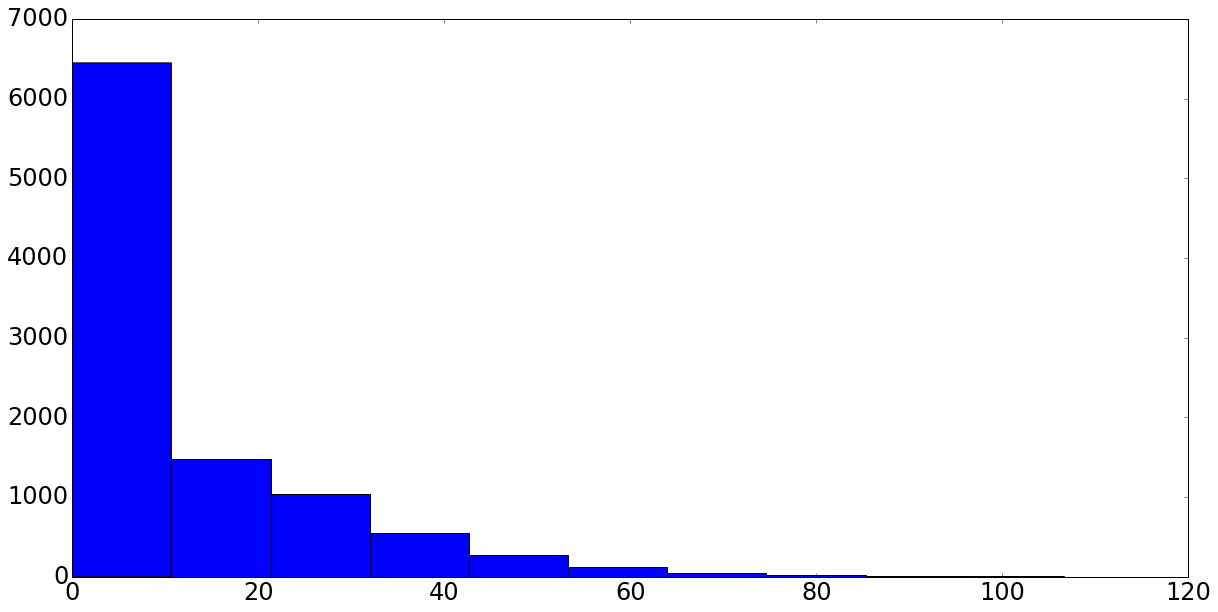

In [29]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 24})
plt.hist(payoff)
plt.show()

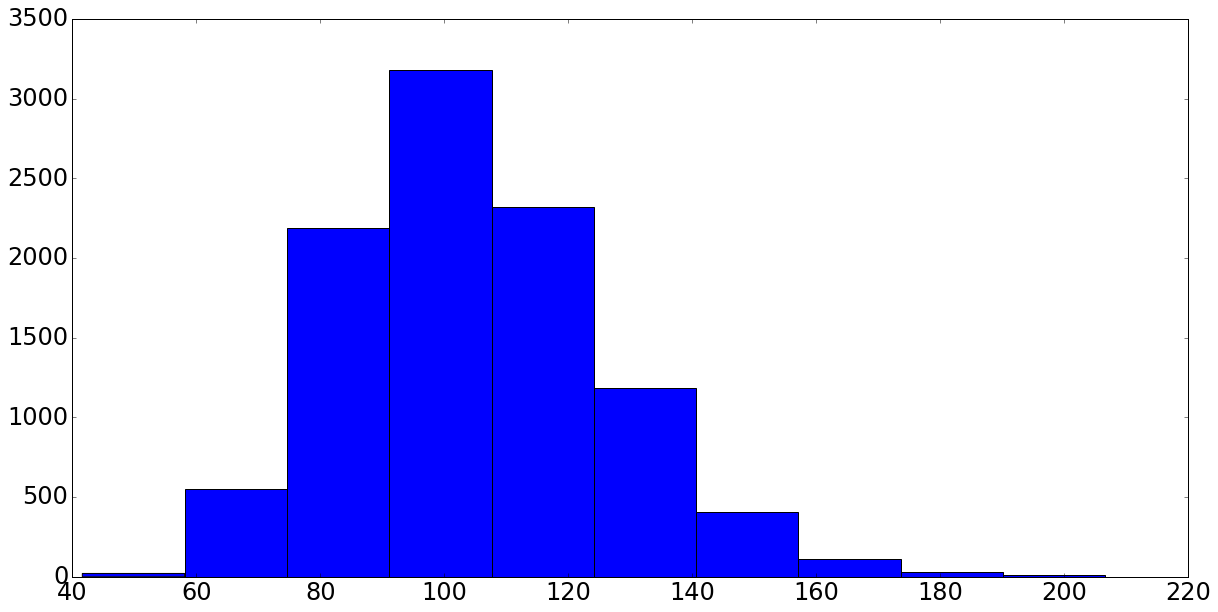

In [30]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 24})
plt.hist(price)
plt.show()

In [4]:
test_put = EuropeanOption('put',100,105,1,0.05,0.05,0.2,100,10000)
print 'Black-Scoles Value:',test_put.BS_value()
print 'Simulated Value:',test_put.value

Black-Scoles Value: 7.90044180772
Simulated Value: (7.7840862176829626, 0.20284353103277586)


In [5]:
import pandas as pd
temp = pd.DataFrame(gbm.BRW(0.05,0.2,100,1,10000,10))

In [6]:
temp.iloc[:,-1].mean()

105.24572478433195